In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('text_analysis.csv')

In [3]:
df.head()

,Title,House,Decade,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs
0,Chicken Run 2000.srt,Aardman,2000,Animation,1016,3.90,4.33,5.12,253,350
1,Flushed Away 2006.srt,Aardman,2000,Animation,2413,3.86,6.35,4.37,890,1408
2,Wallace And Gromit In The Curse Of The Were-Ra...,Aardman,2000,Animation,465,4.39,4.80,5.42,176,163
3,A Shaun the Sheep Movie Farmageddon 2019.srt,Aardman,2010,Animation,228,3.25,1.02,6.49,0,1
4,Arthur Christmas 2011.srt,Aardman,2010,Animation,1877,3.91,4.06,5.40,401,558


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 10 columns):
Title                 445 non-null object
House                 445 non-null object
Decade                445 non-null int64
Category              445 non-null object
Movie_len             445 non-null int64
Avg_WordLen_Movie     445 non-null float64
Avg_PhrLen_Movie      445 non-null float64
Avg_WordLen_Phrase    445 non-null float64
Num_Adjectives        445 non-null int64
Num_Adverbs           445 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 34.9+ KB


In [5]:
v_name = []
v_type = []
v_domain = []
v_is_null = []
for c in df.columns:
    col_list = df[c]
    v_name.append(c)
    v_type.append(type(col_list[0]))
    v_domain.append(sorted(col_list.unique()))
    v_is_null.append(col_list.isnull().any())
    
d = {'variable': v_name, 'type': v_type, 'domain': v_domain, 'any_null': v_is_null}
pd.DataFrame(data=d).set_index('variable')

,type,domain,any_null
variable,,,
Title,<class 'str'>,"[101 dalmatians 1996.srt, 102.Dalmatians.2000....",False
House,<class 'str'>,"[Aardman, Blue, Disney, Dreamworks, Illuminati...",False
Decade,<class 'numpy.int64'>,"[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]",False
Category,<class 'str'>,"[Animation, Animation + Live Action, Live Action]",False
Movie_len,<class 'numpy.int64'>,"[90, 147, 158, 159, 228, 258, 259, 304, 343, 3...",False
Avg_WordLen_Movie,<class 'numpy.float64'>,"[3.25, 3.38, 3.54, 3.58, 3.6, 3.61, 3.62, 3.63...",False
Avg_PhrLen_Movie,<class 'numpy.float64'>,"[1.02, 2.4, 2.85, 2.88, 3.04, 3.1, 3.14, 3.22,...",False
Avg_WordLen_Phrase,<class 'numpy.float64'>,"[3.76, 4.02, 4.05, 4.08, 4.19, 4.21, 4.31, 4.3...",False
Num_Adjectives,<class 'numpy.int64'>,"[0, 41, 42, 44, 48, 51, 57, 67, 69, 71, 75, 89...",False


In [6]:
df['House'].unique()

array(['Aardman', 'Blue', 'Disney', 'Dreamworks', 'Illumination',
       'Paramount', 'Sony', 'StudioGhibli', 'Universal'], dtype=object)

In [7]:
df_disney=df[(df['House'] == 'Disney') & (df['Category'] == 'Animation')]
df_disney_liveaction=df[(df['House'] == 'Disney') & (df['Category'] == 'Live Action')]
df_disney_la=df[(df['House'] == 'Disney') & (df['Category'] == 'Animation + Live Action')]
df_aardman=df[df['House'] == 'Aardman']
df_blue=df[df['House'] == 'Blue']
df_dreamworks=df[df['House'] == 'Dreamworks']
df_illumination=df[df['House'] == 'Illumination']
df_paramount=df[df['House'] == 'Paramount']
df_sony=df[df['House'] == 'Sony']
df_studioghibli=df[df['House'] == 'StudioGhibli']
df_universal=df[df['House'] == 'Universal']

In [8]:
df_paramount.head()

,Title,House,Decade,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs
380,Monster.Trucks.2016.srt,Paramount,2010,Animation,1153,3.78,4.63,4.86,222,473
381,Sherlock.Gnomes.2018.srt,Paramount,2010,Animation,1651,3.95,4.52,5.08,425,598
382,The SpongeBob Movie Sponge Out of Water (2015)...,Paramount,2010,Animation,1406,3.98,4.73,5.21,349,488
383,Wonder.Park.2019.srt,Paramount,2010,Animation,1421,3.95,4.69,5.07,357,510


In [36]:
indexes=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade']]
meandf=df_disney[indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

In [38]:
meandf.head()

Movie_len             Avg_WordLen_Movie           Avg_PhrLen_Movie  \
               mean         std              mean       std             mean   
Decade                                                                         
1940    1001.428571  391.877896          4.034286  0.303142         5.201429   
1950    1289.200000  219.300479          3.894000  0.082946         4.206000   
1960    1413.666667   25.540817          3.833333  0.050332         4.303333   
1970    1673.666667  423.066583          3.816667  0.080829         4.240000   
1980    1170.200000  228.728442          3.882000  0.107796         4.206000   

                 Avg_WordLen_Phrase           Num_Adjectives              \
             std               mean       std           mean         std   
Decade                                                                     
1940    1.606263           5.208571  0.620844     357.000000  140.583309   
1950    0.153395           4.982000  0.141138     331.200000   59.137129   
1960    0.316439           5.106667  0.355293     386.666667   30.088758   
1970    0.871263           4.856667  0.422532     290.666667  248.500168   
1980    0.196163           4.992000  0.241599     334.000000   84.829240   

       Num_Adverbs              
              mean         std  
Decade                          
1940    340.285714  140.251814  
1950    418.600000   60.023329  
1960    470.000000   30.789609  
1970    441.000000  384.391727  
1980    399.000000   65.946948

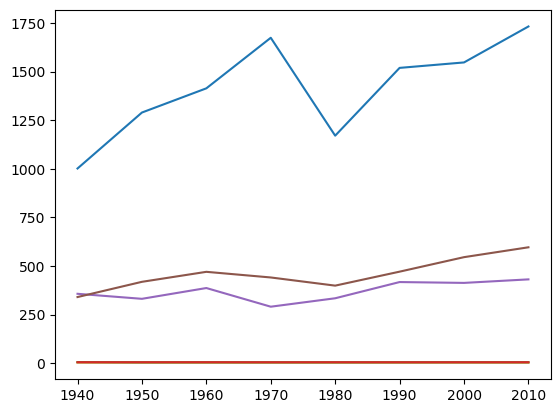

In [37]:
for i in indexes: 

    y=meandf[i]['mean'].values
    x=meandf.index.values
    plt.plot(x,y)
plt.show()

In [ ]:
i=1
for d in range(1940,2010 +1,10):
    ddf=df_disney[df_disney['Decade']== d]
    x=ddf['Movie_len'].values
    ax=plt.subplot(3,3,i)  
    movies= ddf['Title'].values
    y_pos = np.arange(len(movies))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(movies)
    length=x
    ax.barh(y_pos, length, align='center')  
        
    i+=1
plt.show()  

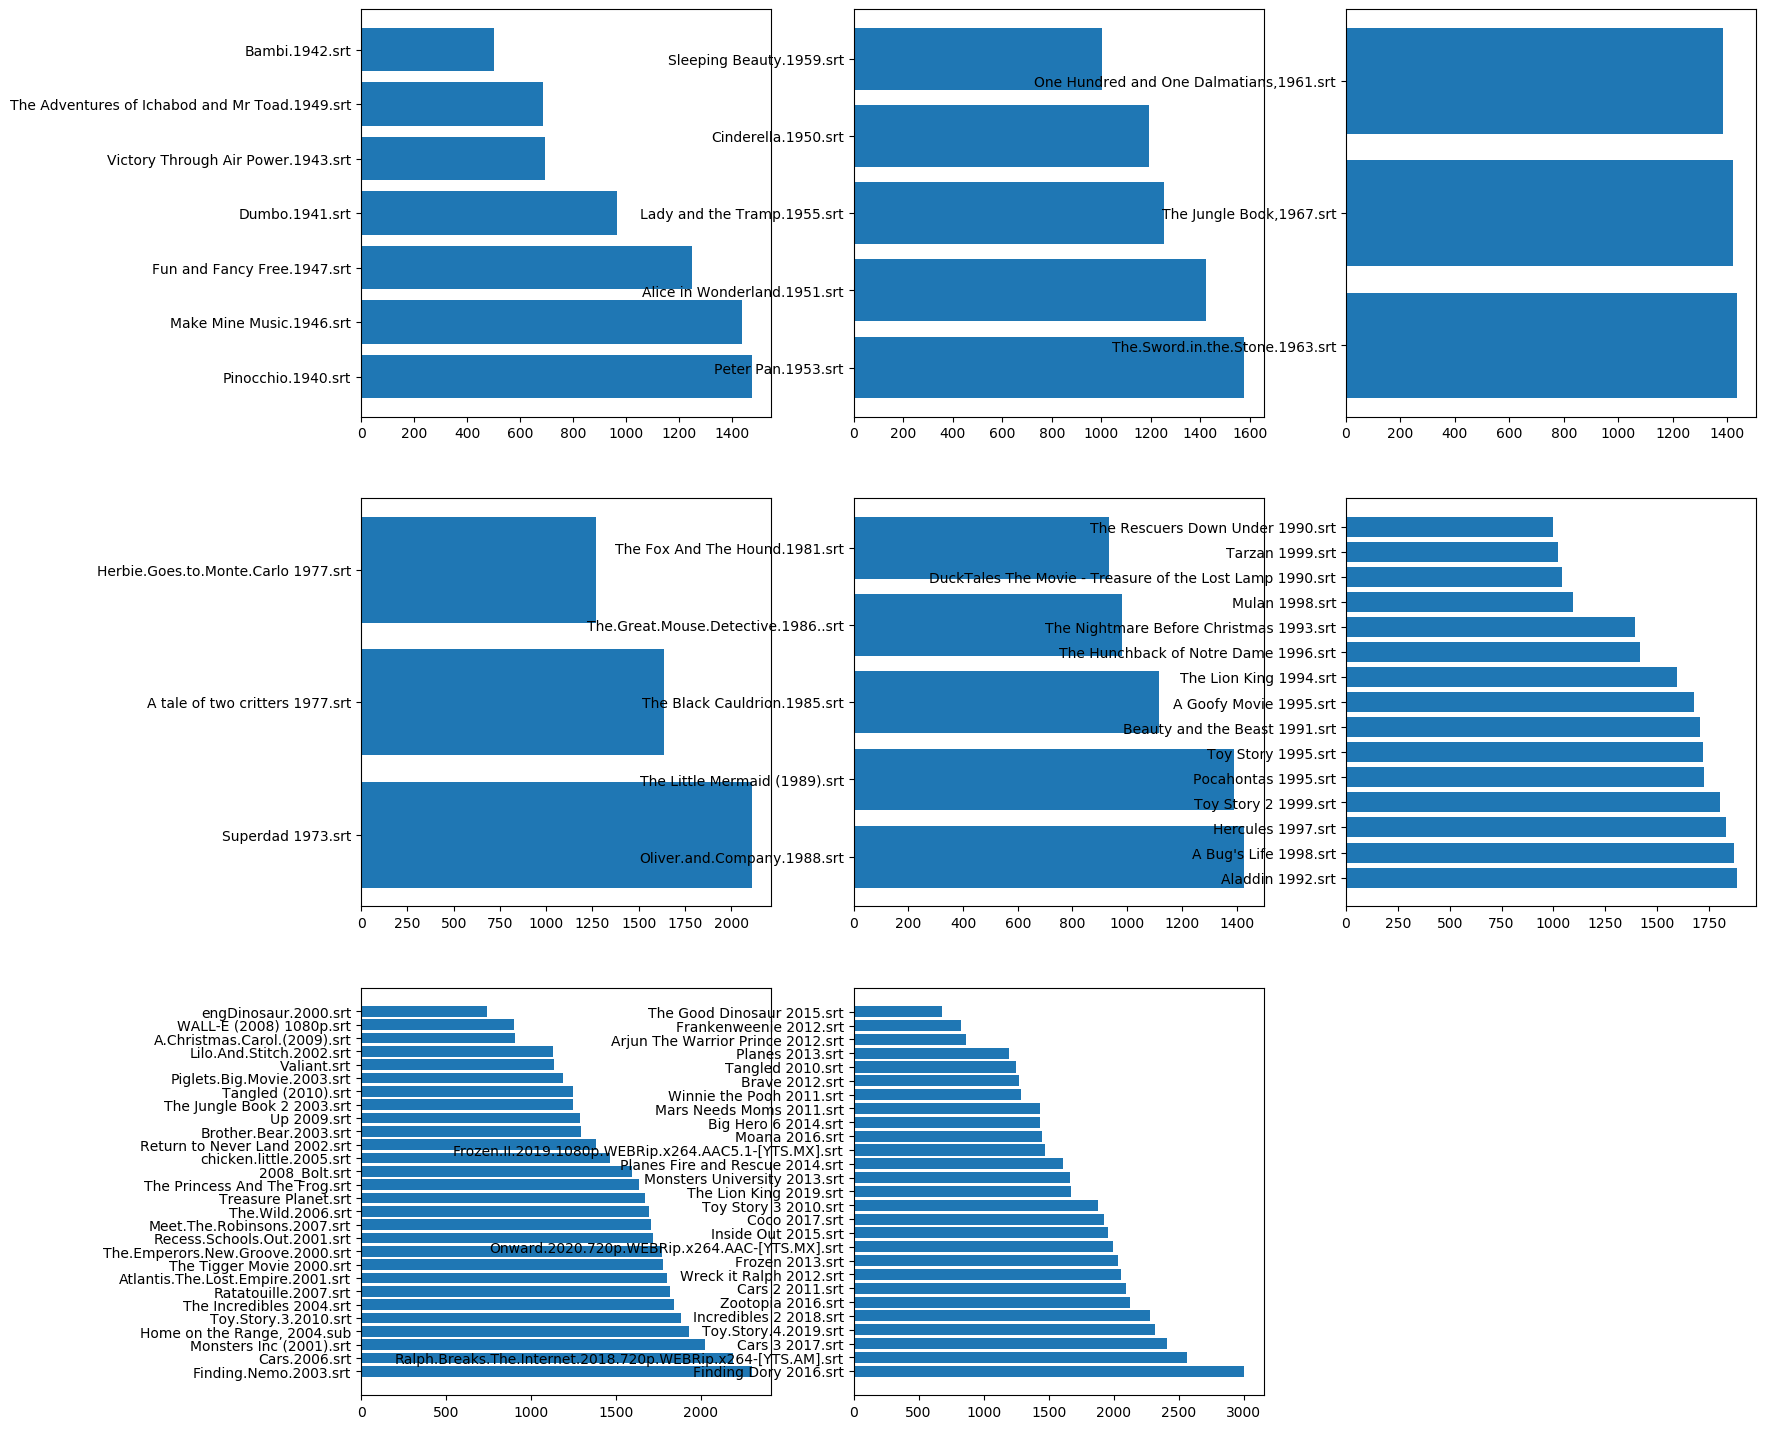

In [27]:
plt.figure(figsize=(18,18))
#fig, ax = plt.subplots()

i=1
for d in range(1940,2010 +1,10):
    ddf=df_disney[df_disney['Decade']== d]
    x=ddf['Movie_len'].values
    ax=plt.subplot(3,3,i)  
    movies= ddf['Title'].values
    y_pos = np.arange(len(movies))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(movies)
    length=x
    ax.barh(y_pos, length, align='center')  
        
    i+=1
plt.show()  

C:\Users\Amministratore\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


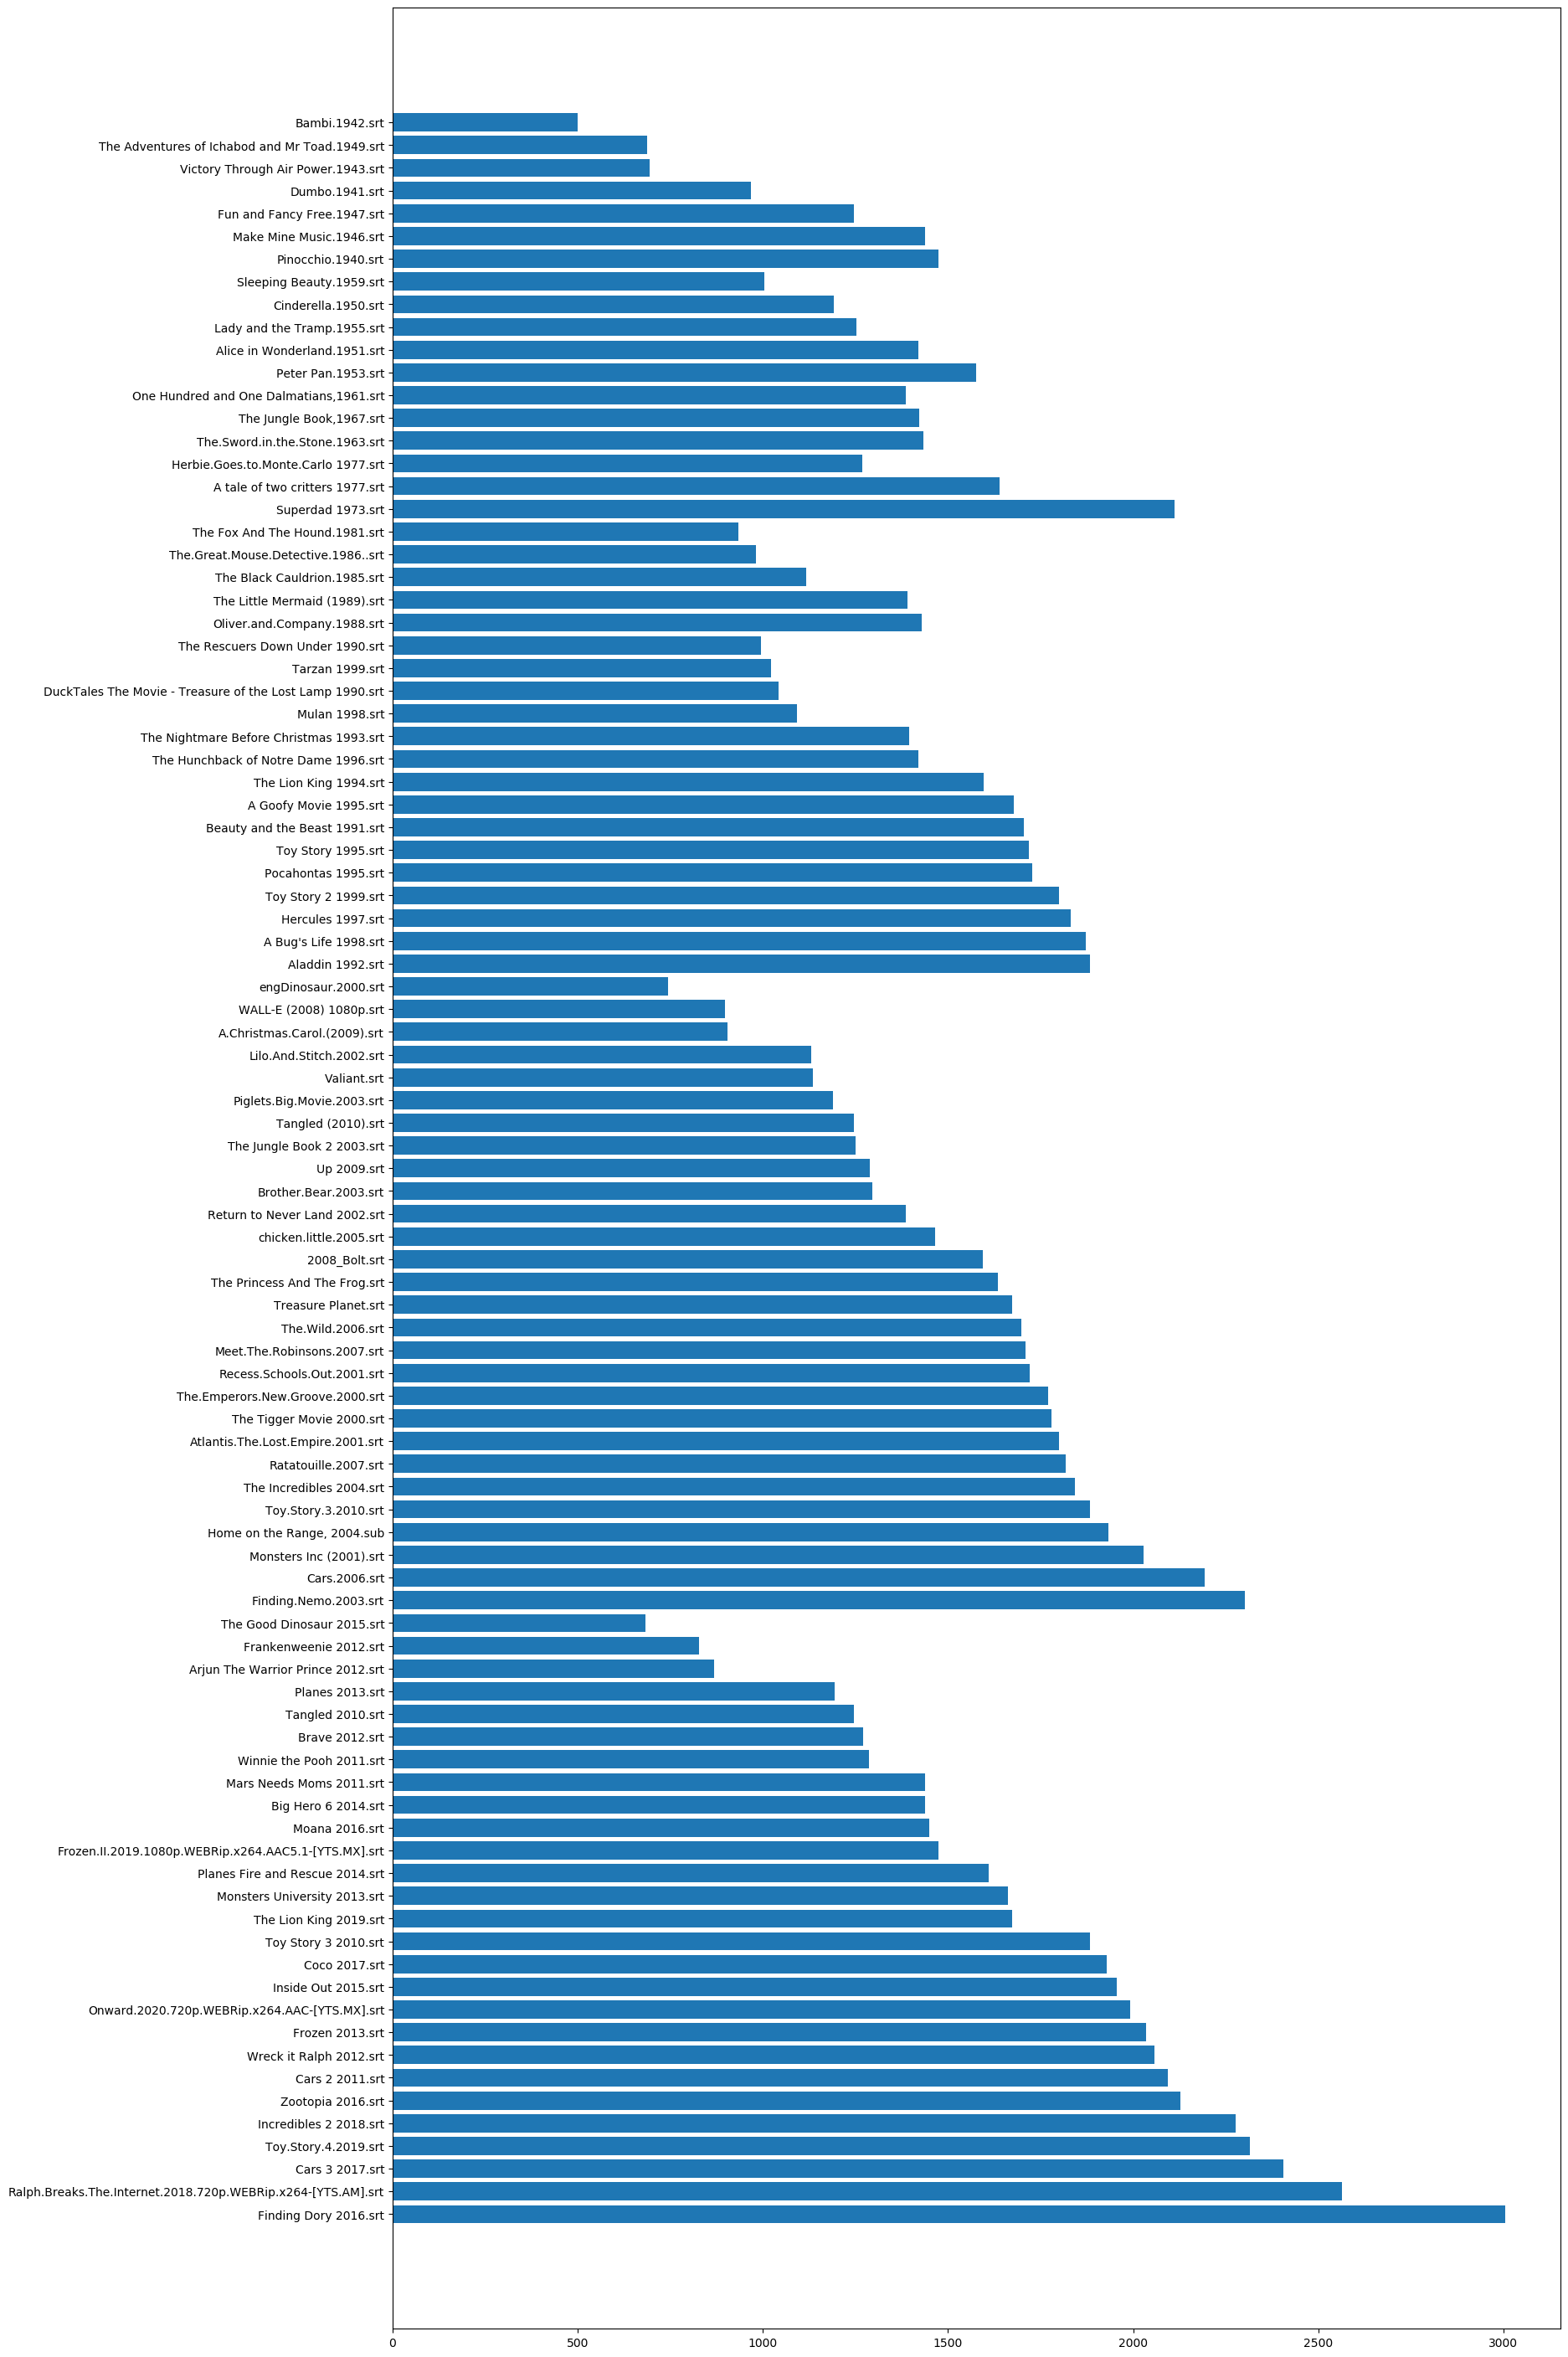

In [31]:
fig, ax = plt.subplots(figsize=(18,36))

df_disney.sort_values(by=['Decade','Movie_len'], inplace= True, ascending=False)
x=df_disney['Movie_len'].values 
movies= df_disney['Title'].values
y_pos = np.arange(len(movies))
ax.set_yticks(y_pos)
ax.set_yticklabels(movies)
length=x
ax.barh(y_pos, length, align='center')  

plt.show()  